In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import seaborn as sns
import csv

In [2]:
games = pd.read_excel('../Results.xlsx', sheet_name='Games')
turns = pd.read_excel('../Results.xlsx', sheet_name='Turns')
pvp_games = games.query('GameState == "END" and idPerson1 not in [10, 30, 203, 217]'
                        ' and idPerson2 not in [10, 30, 203, 217]')
pvp_games_ids = pvp_games['idGame']

In [3]:
pvp_games_turns = []
pvp_games_states = []
pvp_games_choices = []
for i in pvp_games_ids:
    pvp_game_i_turns = turns.query('Games_idGame == ' + str(i))
    if (max(pvp_game_i_turns['idTurn']) >= 400):
        pvp_games_choices.append(pvp_game_i_turns.sort_values(by='idTurn')['Turn'])
        
        for state in pvp_game_i_turns.sort_values(by='idTurn')['State']:
            pvp_games_states.append(state)
        pvp_games_turns.append(max(pvp_game_i_turns['idTurn']))
print(np.mean(pvp_games_turns))

597.6153846153846


In [4]:
from digitalize_states import digitalize_states
for pvp_game_choices in pvp_games_choices:
    choices = digitalize_states(pvp_game_choices)
    cont_table = np.zeros((2, 2), dtype=np.int32)
    for i, j in choices:
        cont_table[i, j] += 1
    print(cont_table)
    choices = np.array(choices).T
    import scipy
    g, p, dof, expctd = scipy.stats.chi2_contingency(cont_table)
    choices = choices * 2 - 1
    #print(np.corrcoef(choices.astype('float64'))[1, 0])
    #print(p, len(pvp_game_choices))
    #plt.figure()
    c = np.correlate(choices[0].astype('float64'), choices[1].astype('float64'), 'full') / len(choices[0])
    max_corr_left = 0
    max_corr_right = 0
    for lag in range(1, 5 + 1):
        max_corr_left = max(max_corr_left, c[len(c) // 2 + lag])
        max_corr_right = max(max_corr_right, c[len(c) // 2 - lag])
    print('max_corr', max_corr_left, max_corr_right)
    #res = plt.xcorr(choices[0].astype('float64'), choices[1].astype('float64'),
    #                    usevlines=True, maxlags=30, normed=True)
    #lags, c = res[:2]
    #print(c[lags == 1])
    plt.show()

[[120 129]
 [112 137]]
max_corr 0.01606425702811245 0.03413654618473896
[[212 207]
 [203 214]]
max_corr 0.03588516746411483 0.03708133971291866
[[118 114]
 [124 106]]
max_corr 0.0021645021645021645 0.12554112554112554
[[ 77 180]
 [ 83 172]]
max_corr 0.0703125 0.09375
[[196  73]
 [187  80]]
max_corr 0.05783582089552239 0
[[129 118]
 [125 126]]
max_corr 0.03413654618473896 0.004016064257028112
[[229  20]
 [232  12]]
max_corr 0 0.06896551724137931
[[117 128]
 [108 133]]
max_corr 0.0205761316872428 0.04938271604938271
[[207 231]
 [198 238]]
max_corr 0 0.05835240274599542
[[149 147]
 [140 148]]
max_corr 0.10445205479452055 0.06164383561643835
[[131 104]
 [138  99]]
max_corr 0.048728813559322036 0.09745762711864407
[[159 125]
 [150 132]]
max_corr 0.07243816254416961 0.019434628975265017
[[250 234]
 [241 240]]
max_corr 0.029015544041450778 0.031088082901554404


In [7]:
N = 16
for i, pvp_game_turns in enumerate(pvp_games_turns):
    qr, probability_matrix, counts = get_prob_matrix(N, [pvp_game_turns], return_counts=True)
    np.save('../data/qr_counts_pvp_400_' + str(i) + '.npy', counts)

In [5]:
from get_prob_matrix import get_prob_matrix
from get_prob_matrix_symmetry import get_prob_matrix_symmetry
from get_fundamental_matrix import get_fundamental_matrix
from get_mean_time import get_mean_time
from get_games_strategy import get_games_strategy
from get_games_hist_2d import get_games_hist_2d

In [7]:
N = 16

hist_2d_inner, hist_2d_border = get_games_hist_2d(N, pvp_games_states)
pvp_400_pmf = np.bincount(pvp_games_turns, minlength=10000) / len(pvp_games_turns)
qr, probability_matrix, counts = get_prob_matrix(N, pvp_games_states, return_counts=True)
qr_symm, probability_matrix_symm = get_prob_matrix_symmetry(N, pvp_games_states)
fundamental_matrix = get_fundamental_matrix(probability_matrix)
fundamental_matrix_symm = get_fundamental_matrix(probability_matrix_symm)
mean_time = get_mean_time(N - 1, fundamental_matrix)
mean_time_symm = get_mean_time(N - 1, fundamental_matrix_symm)
print("mean time: ", mean_time)
print("mean time symm: ", mean_time_symm)

strategy_border, strategy_center = get_games_strategy(N, pvp_games_states)

np.save('../data/qr_counts_pvp_400.npy', counts)
np.save('../data/qr_pvp_400.npy', qr)
np.save('../data/qr_pvp_400_symm.npy', qr_symm)
np.save('../data/strategy_pvp_400_border.npy', strategy_border)
np.save('../data/strategy_pvp_400_center.npy', strategy_center)
np.save('../data/experiment_pvp_400_pmf.npy', pvp_400_pmf)
np.save('../data/experiment_pvp_400_hist_2d_inner.npy', hist_2d_inner)
np.save('../data/experiment_pvp_400_hist_2d_border.npy', hist_2d_border)

even = 0
odd = 0
for i in pvp_games_turns:
    if i % 2 == 0:
        even +=1
    else:
        odd +=1 
print(even / len(pvp_games_turns))
print(odd / len(pvp_games_turns))

mean time:  597.6153846153867
mean time symm:  597.6153846153834
0.15384615384615385
0.8461538461538461


In [6]:
len(pvp_games_turns)

13

In [7]:
np.mean(pvp_games_turns)

597.6153846153846

In [ ]:
with open("q.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(probability_matrix)
with open("q_symm.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(probability_matrix_symm)

with open("qr.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(qr)
with open("qr_symm.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(qr_symm)    
    
with open("fundamental.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(fundamental_matrix)
with open("fundamental_symm.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(fundamental_matrix_symm)

In [8]:
# heatmap
from digitalize_states import digitalize_states
from convert_games2states import convert_games2states
from get_game_trajectories import get_game_trajectories
from get_all_games import get_all_games

states = digitalize_states(pvp_games_states)

pvp_states = np.empty((17,17))
for i in range(0, 17):
    for j in range (0, 17):
        pvp_states[i, j] = states.count((i, j)) / len(states)


pvp_states_symm = convert_games2states(get_all_games(N, get_game_trajectories(states)))
pvp_symm = np.empty((17, 17))
for i in np.arange(0, 17):
    for j in np.arange (0, 17):
        pvp_symm[i, j] = pvp_states_symm.count((i, j)) / len(pvp_states_symm)

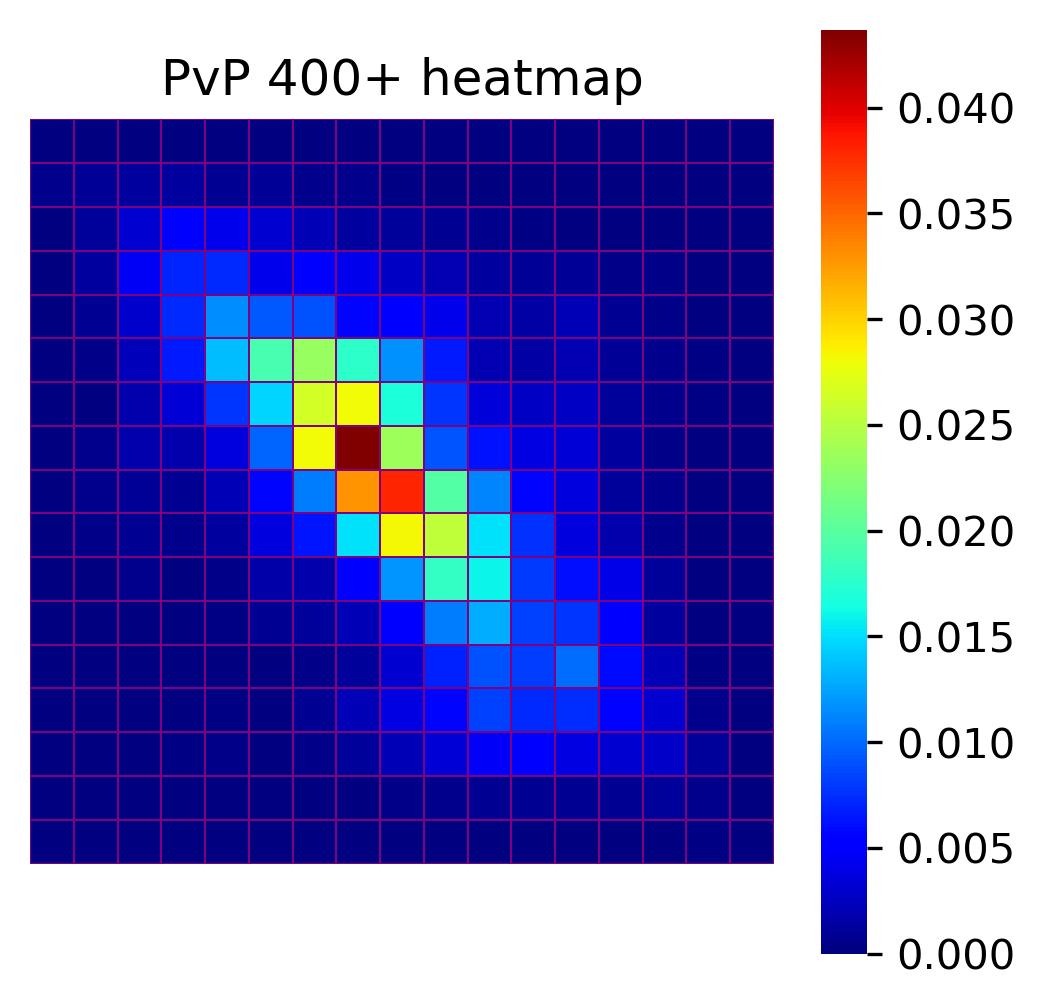

In [12]:
fig, axes = plt.subplots(1, figsize=(4, 4))
plt.rcParams['figure.dpi'] = 300

map = sns.heatmap(pvp_states, cmap='jet', linecolor='purple', 
            linewidth=0.05, ax=axes, square=True, xticklabels=False, yticklabels=False)
axes.set_title("PvP 400+ heatmap")
fig = map.get_figure()
fig.savefig("G:\Studies\Masters\pvp_400_heatmap.png")
plt.show()

In [15]:
# for trajectories
from find_closest import find_closest
from write_states2csv import write_states2csv

games = get_game_trajectories(states)

k = 0
for i in range (len(games)):
    regular_game = games[i]
    write_states2csv("PvP400+", "regular", regular_game, i)

In [10]:
print(pvp_states[8, 8])
print(pvp_symm[8,8])

0.03790799280390645
0.03790799280390645


In [11]:
#fig, axes = plt.subplots(2, figsize=(8.27, 5.5))
#plt.rcParams['figure.dpi'] = 300

#sns.heatmap(pvp_states, cmap='jet', linecolor='purple', 
#            linewidth=0.05, ax=axes[0], square=True, xticklabels=False, yticklabels=False)
#axes[0].set_title("PvP heatmap")
#sns.heatmap(pvp_symm, cmap='jet', linecolor='purple', 
#            linewidth=0.05, ax=axes[1], square=True,  xticklabels=False, yticklabels=False)
#axes[1].set_title("PvP symmetry heatmap")
#plt.show()

In [8]:
from generate_distribution import generate_distribution

In [9]:
gen_turns, sample_games = generate_distribution(N, qr)
gen_turns_symm, sample_games = generate_distribution(N, qr_symm)

100%|█████████████████████████████████████████████████████████████████████████| 100000/100000 [03:42<00:00, 448.97it/s]


In [18]:
k = 0
for i in range (0, 7):
    k += ((-1) ** i) * i
    closest2short_index = find_closest(np.quantile(gen_turns, 0.25) + k, gen_turns)
    closest2mean_index = find_closest(np.mean(gen_turns) + k, gen_turns)
    closest2long_index = find_closest(np.quantile(gen_turns, 0.75) + k, gen_turns)

    short_game = sample_games[closest2short_index]
    regular_game = sample_games[closest2mean_index]
    long_game = sample_games[closest2long_index]
    
    print(len(short_game))

    write_states2csv("PvP400+_sampling", "short", short_game, i)
    write_states2csv("PvP400+_sampling", "regular", regular_game, i)
    write_states2csv("PvP400+_sampling", "long", long_game, i)

204
203
205
202
206
201
207


In [10]:
print(np.mean(gen_turns))
print(np.mean(gen_turns_symm))
even = 0
odd = 0
even_symm = 0
odd_symm = 0
for i in gen_turns:
    if i % 2 == 0:
        even += 1
    else:
        odd += 1
        
for i in gen_turns_symm:
    if i % 2 == 0:
        even_symm += 1
    else:
        odd_symm += 1

        
print(even / len(gen_turns))
print(odd / len(gen_turns))
print(even_symm / len(gen_turns_symm))
print(odd_symm / len(gen_turns_symm))

600.19954
600.50375
0.15218
0.84782
0.15507
0.84493


In [15]:
xtick = 50
bin_width = 16
start_point = 40
end_point = 400
bins_ranges = []
gen_turns_count = []

for i in np.arange(8, max(gen_turns)+bin_width, bin_width):
    bins_ranges.append(i)

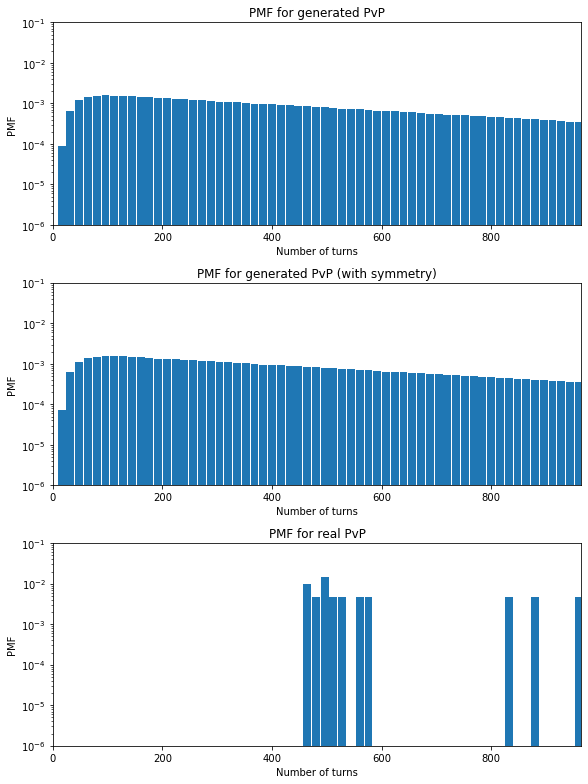

In [16]:
fig, axes = plt.subplots(3, figsize=(8.27, 11))
plt.rcParams['figure.dpi'] = 300
max_x = max(pvp_games_turns)

axes[0].set_yscale("log")
axes[0].set_xlabel("Number of turns")
axes[0].set_ylabel("PMF")
axes[0].set_title("PMF for generated PvP")
axes[0].set_ylim(ymin = 0.000001, ymax = 0.1)
axes[0].set_xlim(xmin = 0, xmax = max_x)
n_pvp_gen, bins_pvp_gen, patches_pvp_gen = axes[0].hist(gen_turns, 
                                                        bins=bins_ranges, 
                                                        rwidth=0.9, density=True) 
axes[1].set_yscale("log")
axes[1].set_xlabel("Number of turns")
axes[1].set_ylabel("PMF")
axes[1].set_title("PMF for generated PvP (with symmetry)")
axes[1].set_ylim(ymin = 0.000001, ymax = 0.1)
axes[1].set_xlim(xmin = 0, xmax = max_x)
n_pvp_gen_symm, bins_pvp_gen_symm, patches_pvp_gen_symm = axes[1].hist(gen_turns_symm, 
                                                                       bins=bins_ranges, 
                                                                       rwidth=0.9, density=True) 
axes[2].set_yscale("log")
axes[2].set_xlabel("Number of turns")
axes[2].set_ylabel("PMF")
axes[2].set_title("PMF for real PvP")
axes[2].set_ylim(ymin = 0.000001, ymax = 0.1)
axes[2].set_xlim(xmin = 0, xmax = max_x)
n_pvp, bins_pvp, patches_pvp = axes[2].hist(pvp_games_turns, 
                                            bins=bins_ranges, 
                                            rwidth=0.9, density=True)
fig.tight_layout()
plt.show()

In [17]:
xs_sampling = []
ys_sampling = []
for i in range (0, len(bins_pvp_gen) - 1):
    xs_sampling.append(bins_pvp_gen[i] + (bins_pvp_gen[i + 1] - bins_pvp_gen[i]) / 2)
ys_sampling = n_pvp_gen

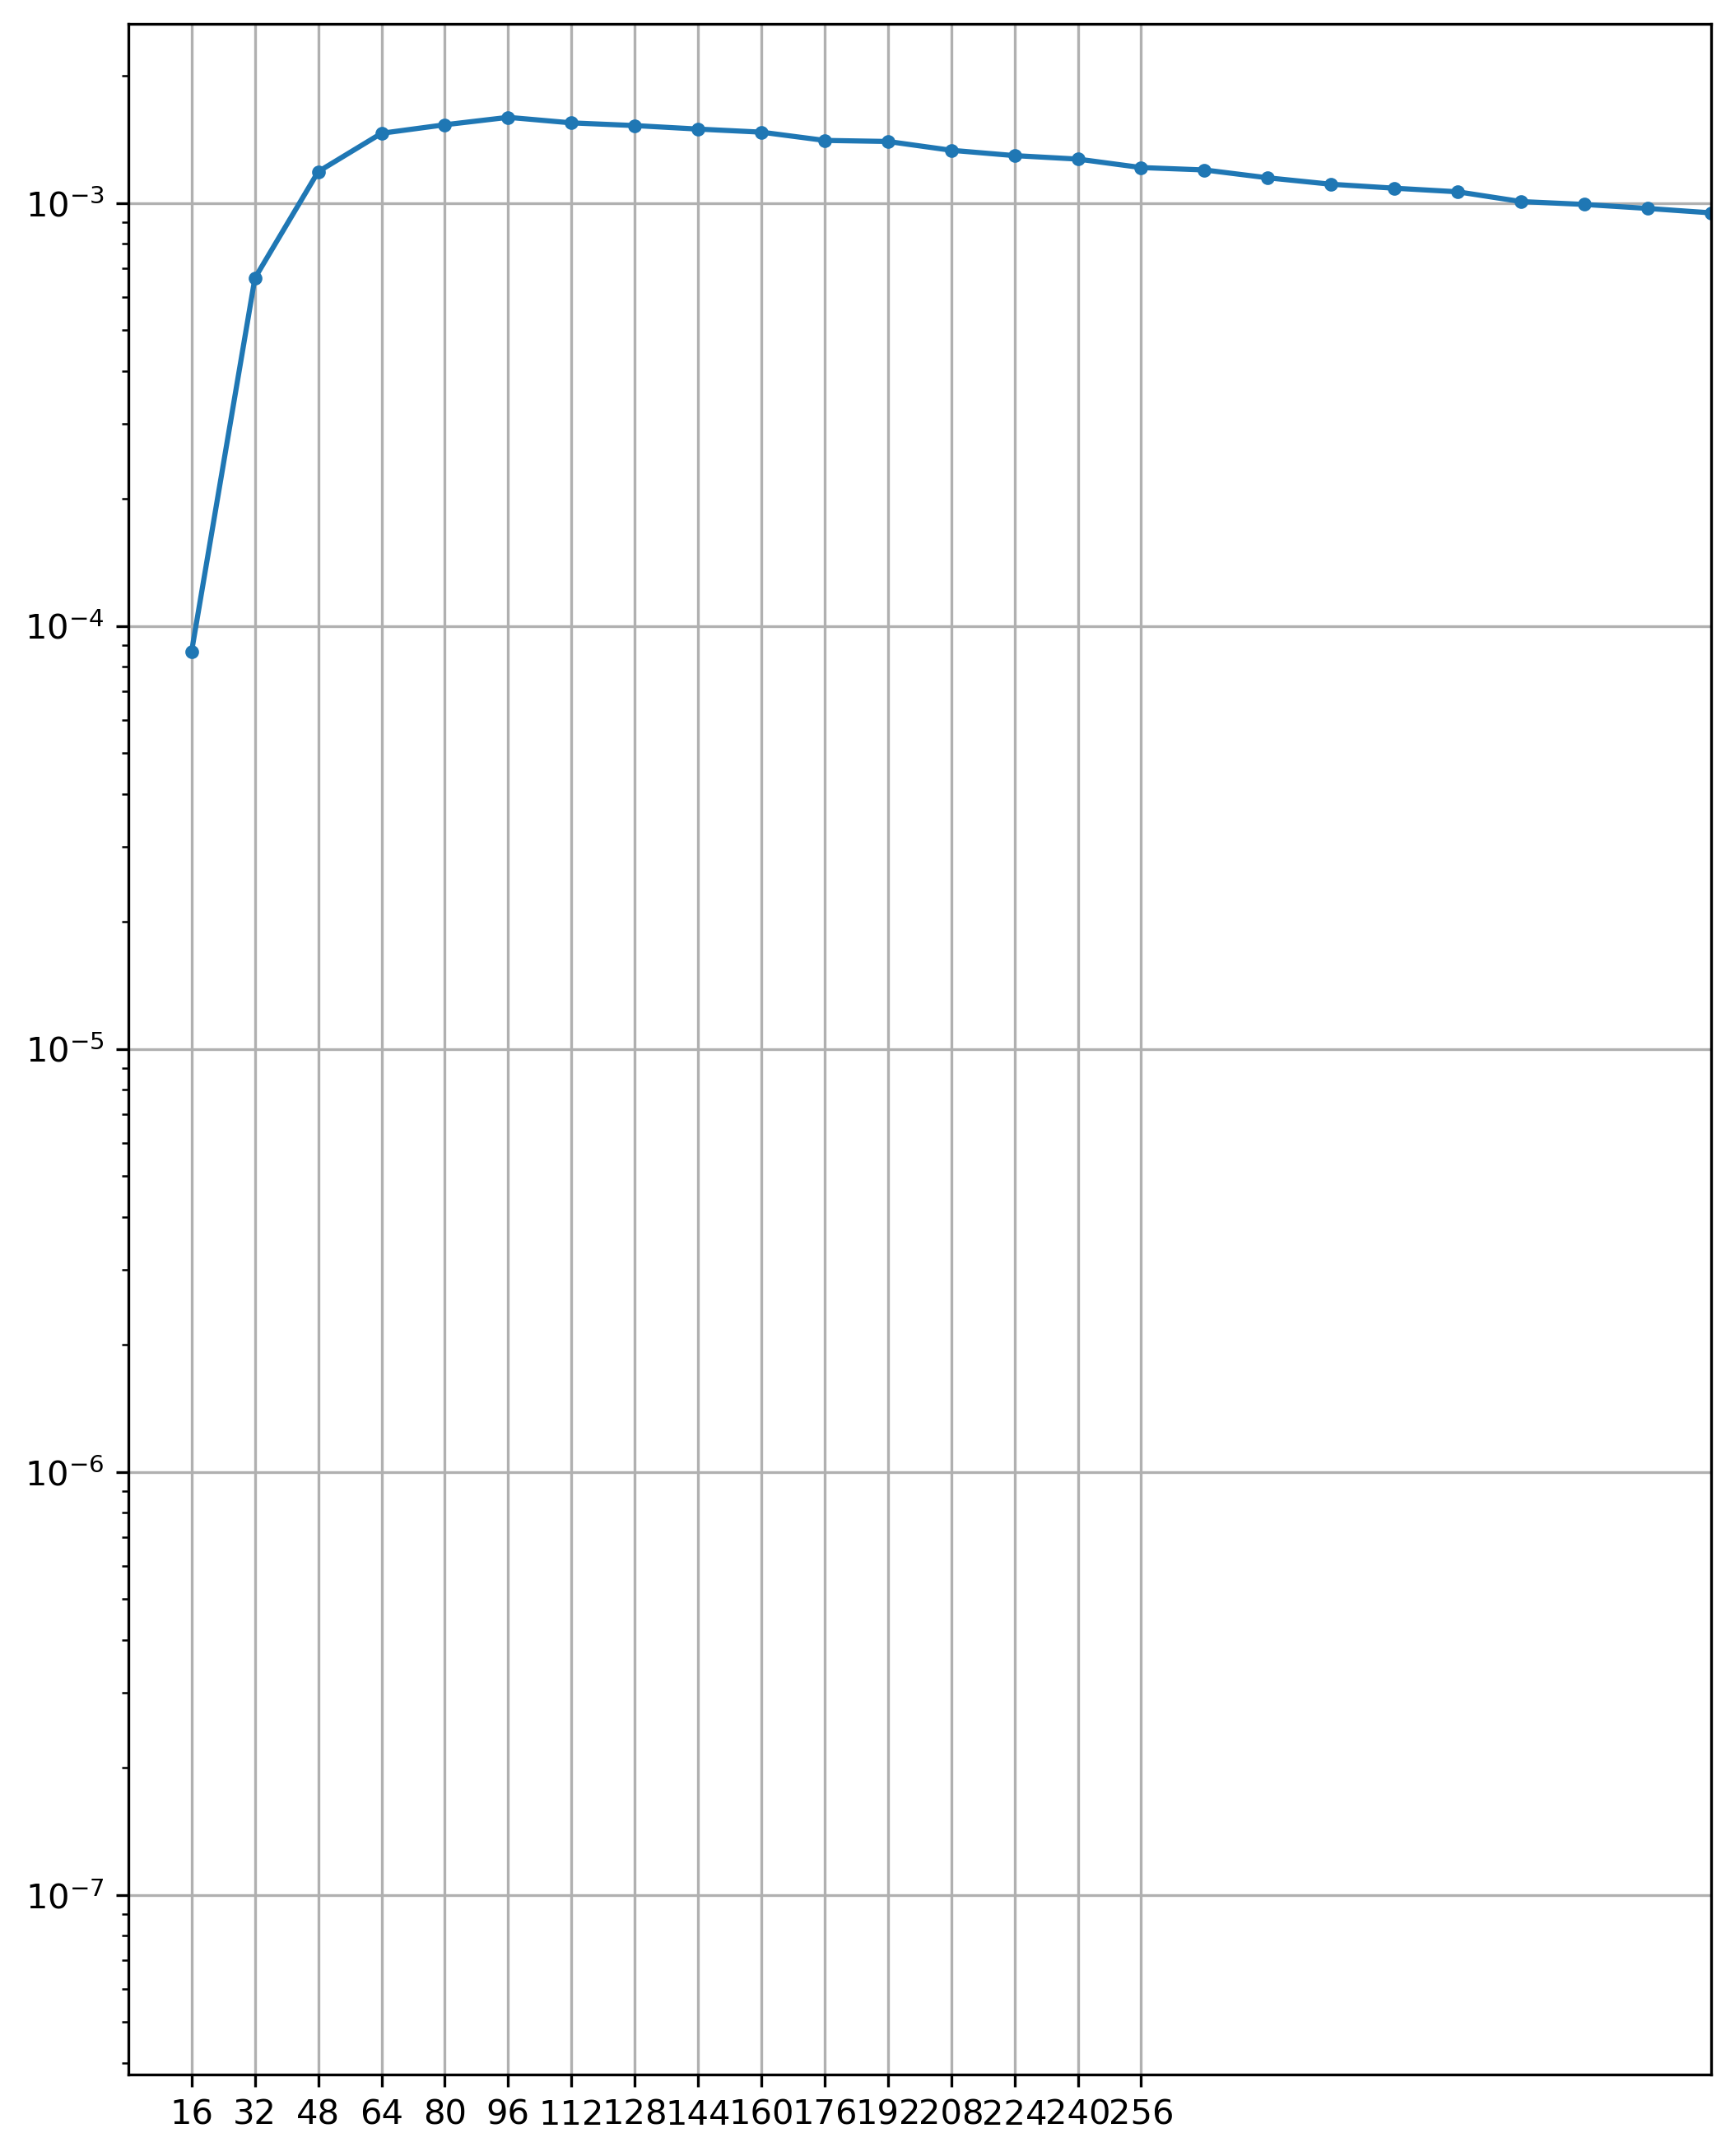

In [18]:
plt.rcParams['figure.figsize']=(8.27, 11)
plt.rcParams['figure.dpi'] = 300
plt.xlim(0, 400)
plt.xticks(xs_sampling[0:16])
plt.grid()
plt.plot(xs_sampling, ys_sampling,'.-')
plt.yscale("log")
plt.show()

In [11]:
from model_pvp import model_pvp

In [12]:
d, prob, (even, odd) = model_pvp(N, qr)
d_symm, prob_symm, (even_symm, odd_symm) = model_pvp(N, qr_symm)

In [21]:
print(sum(d))
print(sum(d_symm))

601.8745109279234
605.9280418704801


In [13]:
print(even)
print(odd)
print(even_symm)
print(odd_symm)

0.15384615130599102
0.8461538323247217
0.15384615146632064
0.8461538330268327


NameError: name 'xs' is not defined

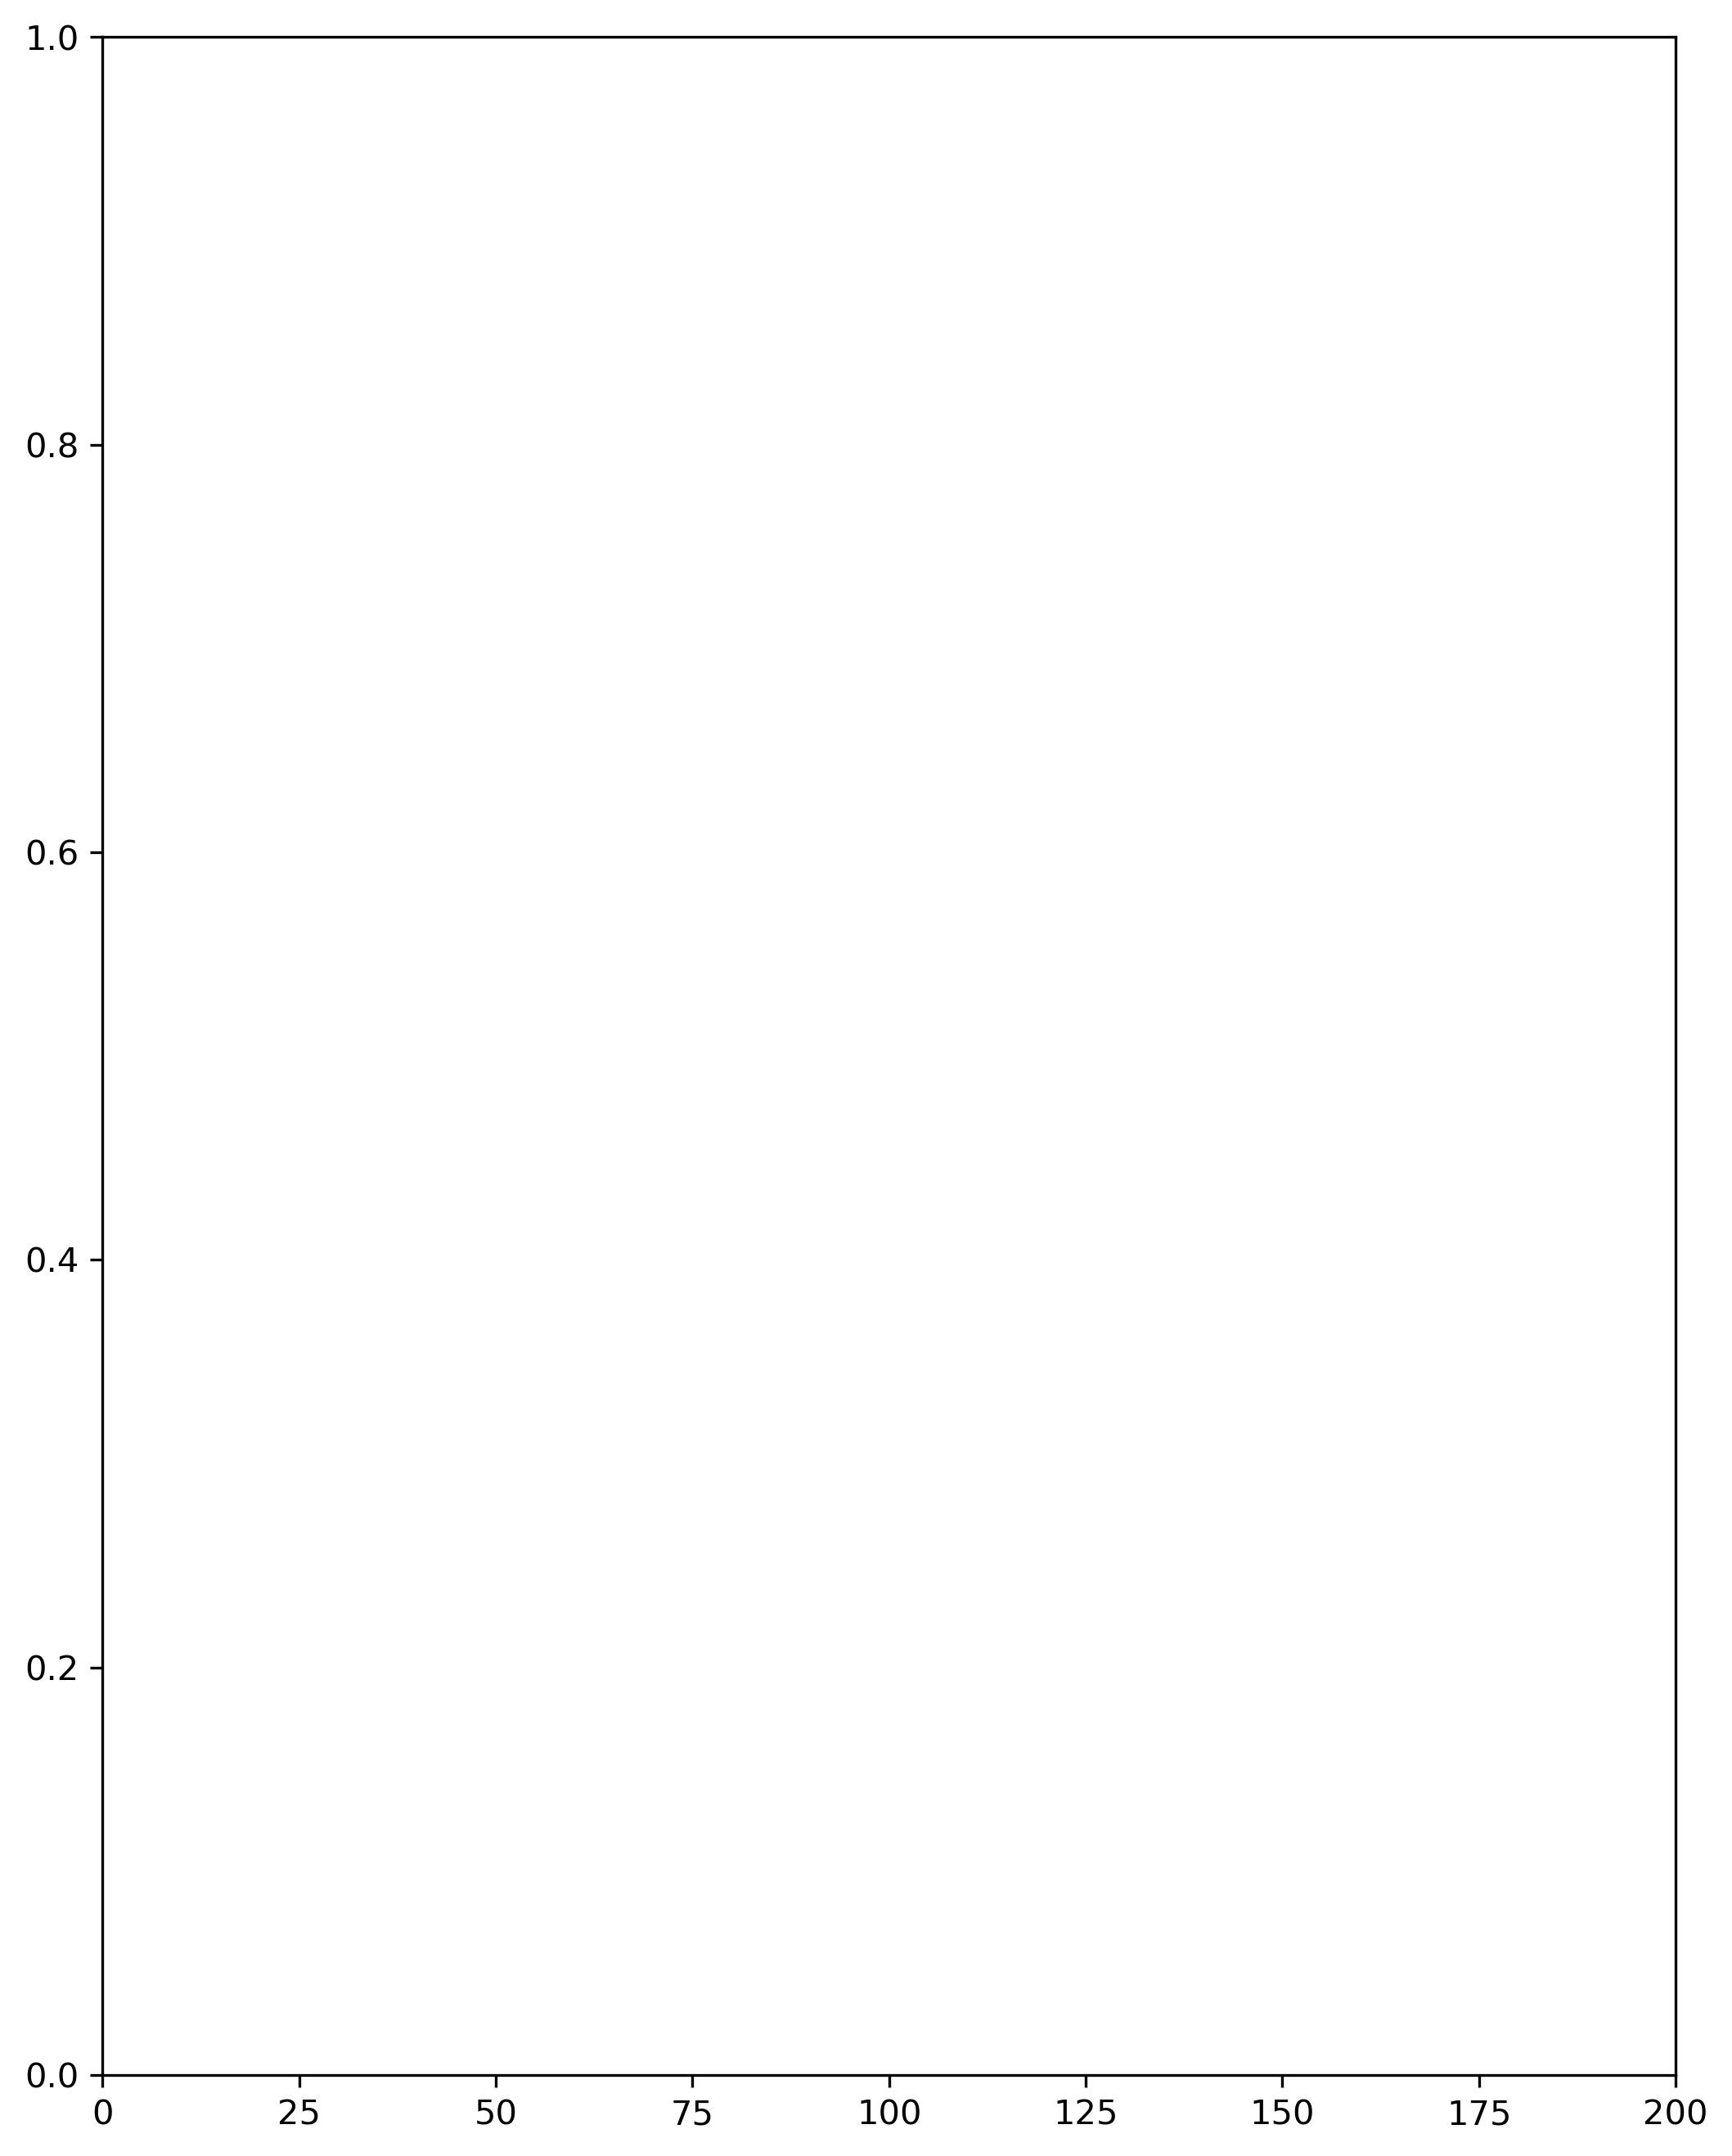

In [23]:
plt.rcParams['figure.figsize']=(8.27, 11)
plt.rcParams['figure.dpi'] = 300
plt.xlim(0, 200)
plt.xticks(xs[0:16])
plt.grid()

xs = []
ys = []
x0 = 8 + bin_width / 2
for i in range (0, len(prob) // bin_width):
    xs.append(x0 + bin_width * i)
for i in range (0, len(prob) // bin_width):
    ys.append(sum(prob[bin_width * i : bin_width * (i + 1)]) / bin_width)
plt.plot(xs, ys,'.-')
plt.yscale("log")
plt.show()

In [ ]:
xs_ys = [[],[]]
xs_ys[0].append("x")
xs_ys[1].append("y")
xs_ys[0].extend(xs)
xs_ys[1].extend(ys)
xs_ys = np.array(xs_ys)
xs_ys = np.transpose(xs_ys)

In [ ]:
with open("../csv/pvp_400_model.csv","w+") as my_csv:
    csvWriter = csv.writer(my_csv,delimiter=',')
    csvWriter.writerows(xs_ys)

In [ ]:
plt.plot(prob, '.')
plt.xlim([8, 200])
plt.ylim(ymin = 0.000001, ymax = 0.01)
plt.yscale("log")
plt.show()

In [ ]:
pvp_count = []
uniques = np.array(gen_turns)
uniques = np.unique(uniques)
for i in uniques:
    pvp_count.append(gen_turns.count(i) / len(gen_turns))
    
pvp_count_symm = []
uniques_symm = np.array(gen_turns_symm)
uniques_symm = np.unique(uniques)
for i in uniques:
    pvp_count_symm.append(gen_turns_symm.count(i) / len(gen_turns_symm))

In [ ]:
#plt.plot(uniques, pvp_count)
plt.yscale("log")
plt.xlabel("Number of turns")
plt.ylabel("PMF")
plt.title("PMF for real PvP")



plt.ylim(ymin = 0.000001, ymax = 0.1)
#plt.plot(uniques, pvp_count, 'g.', label="Sampling")
plt.plot(xs_sampling, ys_sampling, 'g-', label="Sampling")
plt.xlim([0, 2000])

n_pvp, bins_pvp, patches_pvp = plt.hist(pvp_games_turns, 
                                            bins=bins_ranges, 
                                            rwidth=0.9, density=True, label="hist")

#plt.plot(prob, 'r.', label="Modelling")
plt.plot(xs, ys, 'r-', label="Modelling")
plt.legend()
#pvp_count = np.array(pvp_count)
#pvp_count = pvp_count / sum(pvp_count)
plt.show()

In [ ]:
fig, axes = plt.subplots(3, figsize=(8.27, 11))
plt.rcParams['figure.dpi'] = 300
#max_x = max(pvp_games_turns)
max_x = 4500

axes[0].set_yscale("log")
axes[0].set_xlabel("Number of turns")
axes[0].set_ylabel("PMF")
axes[0].set_title("PMF for generated PvP 400+")
axes[0].set_ylim(ymin = 0.000001, ymax = 0.01)
axes[0].set_xlim(xmin = 0, xmax = max_x)
n_pvp_gen, bins_pvp_gen, patches_pvp_gen = axes[0].hist(gen_turns, 
                                                        bins=bins_ranges, 
                                                        rwidth=0.9, density=True, 
                                                        label="Sampling") 
#axes[0].plot(prob, 'r.', label="Modelling")
axes[0].plot(xs, ys, 'r-', label="Modelling")
axes[0].legend()
axes[1].set_yscale("log")
axes[1].set_xlabel("Number of turns")
axes[1].set_ylabel("PMF")
axes[1].set_title("PMF for generated PvP 400+(with symmetry)")
axes[1].set_ylim(ymin = 0.000001, ymax = 0.01)
axes[1].set_xlim(xmin = 0, xmax = max_x)
n_pvp_gen_symm, bins_pvp_gen_symm, patches_pvp_gen_symm = axes[1].hist(gen_turns_symm, 
                                                                       bins=bins_ranges, 
                                                                       rwidth=0.9, density=True, 
                                                                       label="Sampling symm") 
#axes[1].plot(prob, 'r.', label="Modelling")
axes[1].plot(xs, ys, 'r-', label="Modelling")
axes[1].legend()
axes[2].set_yscale("log")
axes[2].set_xlabel("Number of turns")
axes[2].set_ylabel("PMF")
axes[2].set_title("PMF for real PvP 400+")
axes[2].set_ylim(ymin = 0.000001, ymax = 0.01)
axes[2].set_xlim(xmin = 0, xmax = max_x)
n_pvp, bins_pvp, patches_pvp = axes[2].hist(pvp_games_turns, 
                                            bins=bins_ranges, 
                                            rwidth=0.9, density=True,
                                            label="Real pvp games")
#axes[2].plot(prob, 'r.', label="modelling")
axes[2].plot(xs, ys, 'r-', label="Modelling")
axes[2].legend()
fig.tight_layout()
plt.show()